# Modelling feature importance

## F-Regression for feature weights with p-values

In [ ]:
# renaming column names
import pandas as pd
wordclass = 'nouns'
#wordclass = 'verbs'
#wordclass = 'adj'


df = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTable.csv'
df = pd.read_csv(df)
print(list(df.columns))
df.rename(columns={'Unnamed: 0': 'Target'}, inplace=True)

df.to_csv('/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTableTEMPLATE.csv',index=False )

In [3]:
# SelectKBest
# example of correlation feature selection for numerical data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler

wordclass = 'nouns'
#wordclass = 'verbs'
#wordclass = 'adj'

df = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTableNewPOSVariance.csv'
df = pd.read_csv(df)
df = df.drop(['Target'], axis=1)
#df = df.to_numpy()

# selecting features
#df = df.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1) #features not used
featurelist = list(df.columns)
featurelist.remove('CS')
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('Linear Regression: Feature weights one fold whole dataset no performance with F-Regression NewPOSVariance',file=f)
    print(wordclass+'_FeatureTableNewPOS.csv: '+str(df.shape),file =f)

# LinearRegression with feature performance
# normalizing features: center to same mean and unit variance with z-score scaling (StandardScaler())
#scaler = StandardScaler()
# normlaizing features: 
df = df.to_numpy()
X = df[:, 1:]    #assoc vectors: predictors
y = df[:, 0]     #CS: response variable
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

scoretype = 'f_regression'

fs = SelectKBest(score_func=f_regression, k='all') # regression
# learn relationship from training data
fs.fit(X_scale, y)

print('Scores: '+str(fs.scores_))
print('P-Values: '+ str(fs.pvalues_))
print('Features: '+ str(featurelist))

# sorting output for score values
sort_index = np.argsort(fs.scores_)
print(sort_index)
sorted_features = [featurelist[i] for i in sort_index]
sorted_scores = [fs.scores_[i] for i in sort_index]
sorted_pvalues = [fs.pvalues_[i] for i in sort_index]
print(sorted_features)
print(sorted_scores)
print(sorted_pvalues)
      
# what are scores for the features
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('SelectKBest: correlation feature selection NewPOSVariance, Scoring: '+ scoretype,file=f)
    print('Scores: '+str(sorted_scores),file=f)
    print('P-Values: '+ str(sorted_pvalues),file=f)
    print('Features: '+ str(list(sorted_features)),file=f)


Scores: [8.45549591e+02 6.38716097e+02 2.49142198e+02 5.43700354e+02
 2.11474401e+04 1.00338911e+02 3.97259135e-01 8.90207711e+00
 1.72183879e+04 3.97723883e+02 5.48226529e+01 6.37417781e+02
 1.88053937e+04 4.43225129e+02]
P-Values: [1.37444656e-167 3.96792995e-130 2.29612587e-054 2.60929136e-112
 0.00000000e+000 2.54073839e-023 5.28547124e-001 2.86709857e-003
 0.00000000e+000 3.95203745e-084 1.62510403e-013 6.90811559e-130
 0.00000000e+000 5.06389108e-093]
Features: ['AmountTypes', 'AmountNA', 'HighestRF', 'LowestRF', 'VarianceRF', 'AverageDistanceT-A', 'HighestDistanceT-A', 'LowestDistanceT-A', 'VarianceDistanceT-A', 'AverageDistanceA-A', 'HighestDistanceA-A', 'LowestDistanceA-A', 'VarianceDistanceA-A', 'VariancePOS']
[ 6  7 10  5  2  9 13  3 11  1  0  8 12  4]
['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'AverageDistanceT-A', 'HighestRF', 'AverageDistanceA-A', 'VariancePOS', 'LowestRF', 'LowestDistanceA-A', 'AmountNA', 'AmountTypes', 'VarianceDistanceT-A', 'Vari

In [ ]:
# plot coefficients
fig, ax = plt.subplots()
width = 0.2
ticks = np.arange(1,len(sorted_features)+1,1)
ax.bar((ticks+width), height=sorted_scores, width = width, align='center',ec='blue') # plotting feature sccores 
ax.set_ylabel('log F-Value')

ax2 = ax.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], sorted_pvalues)  # plotting p-values
ax2.set_ylabel('p-value')

ax3 = ax.twinx()
ax3.sharey(ax2)
ax3.plot([0,22],[0.005,0.005], color = 'black')  #plotting 0.005 p-value threshold

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(sorted_features,rotation=90,fontsize=8) 
ax.set_yscale('log')
fig.suptitle("Feature importances via F-Regression for " + wordclass)
fig.show()

## F-Classification for feature weights with pvalues


In [6]:
# SelectKBest
# example of correlation feature selection for numerical data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

wordclass = 'nouns'
#wordclass = 'verbs'
#wordclass = 'adj'

df = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTableNewPOSVariance.csv'
df = pd.read_csv(df)
df = df.drop(['Target'], axis=1)
#df = df.to_numpy()

# selecting features
#df = df.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1) #features not used
df['CS'].values[df['CS'].values < df['CS'].median()] = 0  #abstract categorical
df['CS'].values[df['CS'].values >= df['CS'].median()] = 1 #concrete categorical
featurelist = list(df.columns)
featurelist.remove('CS')
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('Logistic Regression: Feature weights one fold whole dataset no performance with F-Regression NewPOSVariance',file=f)
    print(wordclass+'_FeatureTableNewPOS.csv: '+str(df.shape),file =f)

# LinearRegression with feature performance
# normalizing features: center to same mean and unit variance with z-score scaling (StandardScaler())
#scaler = StandardScaler()
# normlaizing features: 
df = df.to_numpy()
X = df[:, 1:]    #assoc vectors: predictors
y = df[:, 0]     #CS: response variable
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

scoretype = 'f_classif'

fs = SelectKBest(score_func=f_classif, k='all') # regression
# learn relationship from training data
fs.fit(X_scale, y)

print('Scores: '+str(fs.scores_))
print('P-Values: '+ str(fs.pvalues_))
print('Features: '+ str(featurelist))

# sorting output for score values
sort_index = np.argsort(fs.scores_)
print(sort_index)
sorted_features = [featurelist[i] for i in sort_index]
sorted_scores = [fs.scores_[i] for i in sort_index]
sorted_pvalues = [fs.pvalues_[i] for i in sort_index]
print(sorted_features)
print(sorted_scores)
print(sorted_pvalues)

      
# what are scores for the features
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('SelectKBest: correlation feature selection NewPOSVariance, Scoring: '+ scoretype,file=f)
    print('Scores: '+str(sorted_scores),file=f)
    print('P-Values: '+ str(sorted_pvalues),file=f)
    print('Features: '+ str(list(sorted_features)),file=f)
    print('--------------------------------------------------------------------',file=f)


Scores: [5.73889914e+02 3.93997877e+02 1.77677964e+02 3.40545409e+02
 7.81812367e+03 1.07563486e+02 1.11781124e+00 7.99552282e+00
 7.15714815e+03 3.41102909e+02 3.94918994e+01 5.15752274e+02
 7.58540466e+03 3.01878278e+02]
P-Values: [5.14909638e-118 2.13537777e-083 1.26268415e-039 8.24469766e-073
 0.00000000e+000 7.32270205e-025 2.90459336e-001 4.71454823e-003
 0.00000000e+000 6.38282477e-073 3.67729859e-010 5.42744210e-107
 0.00000000e+000 4.62640975e-065]
Features: ['AmountTypes', 'AmountNA', 'HighestRF', 'LowestRF', 'VarianceRF', 'AverageDistanceT-A', 'HighestDistanceT-A', 'LowestDistanceT-A', 'VarianceDistanceT-A', 'AverageDistanceA-A', 'HighestDistanceA-A', 'LowestDistanceA-A', 'VarianceDistanceA-A', 'VariancePOS']
[ 6  7 10  5  2 13  3  9  1 11  0  8 12  4]
['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'AverageDistanceT-A', 'HighestRF', 'VariancePOS', 'LowestRF', 'AverageDistanceA-A', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'Vari

In [ ]:
# plot coefficients
fig, ax = plt.subplots()
width = 0.2
ticks = np.arange(1,len(sorted_features)+1,1)
ax.bar((ticks+width), height=sorted_scores, width = width, align='center',ec='blue') # plotting feature sccores 
ax.set_ylabel('log F-Value')

ax2 = ax.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], sorted_pvalues)  # plotting p-values
ax2.set_ylabel('p-value')

ax3 = ax.twinx()
ax3.sharey(ax2)
ax3.plot([0,22],[0.005,0.005], color = 'black')  #plotting 0.005 p-value threshold

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(sorted_features,rotation=90,fontsize=8) 
ax.set_yscale('log')
fig.suptitle("Feature importances via F-Classification for " + wordclass)
fig.show()

In [ ]:
# values for plotting all features in one plot

sorted_scoresLinA = [0.5953685570590501, 0.890126921060263, 5.854435687193598, 14.843750324223475, 18.69954609526016, 24.534991893412773, 48.589308003284536, 119.09930716989967, 130.15976365292528, 144.46039039328548, 150.6666576028624, 152.925643110716, 236.1562979102764, 309.16460000671304, 4992.338788700127, 8739.962043141672, 10803.176506246138]
sorted_pvaluesLinA = [0.4404839652322059, 0.345609626595759, 0.015667612972945572, 0.0001222055643300106, 1.641202523467962e-05, 8.207462512237221e-07, 4.895758189990945e-12, 1.2066031861950608e-26, 7.296307731066521e-29, 1.0493869129699473e-31, 6.258048762680664e-33, 2.2493925890382187e-33, 2.7849850361617753e-49, 1.5031002778899991e-62, 0.0, 0.0, 0.0]
sorted_featuresLinA = ['HighestDistanceA-A', 'HighestDistanceT-A', 'VerbPOS', 'AverageDistanceT-A', 'LowestDistanceT-A', 'OtherPOS', 'HighestRF', 'AverageDistanceA-A', 'LowestRF', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'AdjPOS', 'NounPOS', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLinV = [0.31259662512200515, 1.1648455527538897, 3.7079906217105885, 4.3824682101742, 25.726373747739018, 31.128215032238987, 47.53516048053959, 61.208969710278026, 64.43888404779268, 67.03193657992634, 74.78621699932624, 88.75080881975327, 100.15262605570915, 102.52139755882106, 2419.938671555229, 3673.6714237871224, 4207.332007767579]
sorted_pvaluesLinV = [0.576254352315406, 0.28080215475011433, 0.0545219354336294, 0.03663824307401804, 4.937995941158102e-07, 3.3501754616108445e-08, 1.1291960887992047e-11, 1.7006392776691654e-14, 3.735522792392638e-15, 1.1119287120515185e-15, 3.0451425005076304e-17, 5.1352649460193e-20, 3.042817518493654e-22, 1.0581409664423172e-22, 1.9688492116211746e-239, 1.0542068925496707e-294, 1.3088812987e-313]
sorted_featuresLinV = ['HighestDistanceA-A', 'AdjPOS', 'HighestDistanceT-A', 'OtherPOS', 'AverageDistanceT-A', 'HighestRF', 'NounPOS', 'LowestDistanceT-A', 'VerbPOS', 'LowestRF', 'AverageDistanceA-A', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLinN = [0.39725913546768105, 8.902077111586571, 29.999230677725002, 52.26783486723411, 54.8226529419252, 90.75484906286088, 100.33891055692158, 217.41221283402922, 249.14219808621, 397.72388343080445, 543.7003542417782, 637.4177812183956, 638.7160967333333, 845.5495907327016, 17218.38788720827, 18805.3937268395, 21147.44010119353]
sorted_pvaluesLinN = [0.5285471241830577, 0.002867098573646048, 4.61030547029412e-08, 5.855852902016935e-13, 1.6251040302160536e-13, 2.8476384130752064e-21, 2.5407383885829056e-23, 7.406821036689406e-48, 2.296125868073079e-54, 3.9520374463323733e-84, 2.6092913634003156e-112, 6.908115587183299e-130, 3.967929951642223e-130, 1.3744465573716462e-167, 0.0, 0.0, 0.0]
sorted_featuresLinN = ['HighestDistanceT-A', 'LowestDistanceT-A', 'OtherPOS', 'VerbPOS', 'HighestDistanceA-A', 'AdjPOS', 'AverageDistanceT-A', 'NounPOS', 'HighestRF', 'AverageDistanceA-A', 'LowestRF', 'LowestDistanceA-A', 'AmountNA', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']

sorted_scoresLogA = [0.06599836546605647, 1.3779570311359168, 6.511079072143223, 10.254474411416581, 10.762966840883566, 12.721813570384825, 27.32454093185861, 86.86594636032633, 100.63521367985996, 109.87503596652093, 110.0371440407152, 112.41450639192124, 212.16395967461239, 260.5630325573557, 1376.5999442601224, 1651.101262987906, 1870.8003958327797]
sorted_pvaluesLogA =  [0.7972934954700228, 0.24065391542597003, 0.010828499481046082, 0.001394942016085012, 0.0010616143097881409, 0.00037389122749715534, 1.9875747956472513e-07, 4.5012584127056755e-20, 6.698775101026648e-23, 8.82398036661328e-25, 8.18075022677389e-25, 2.698895425123298e-25, 8.721795807469386e-45, 8.746251885568694e-54, 4.885863790351789e-209, 2.3142844674258713e-237, 3.1240056330456663e-258]
sorted_featuresLogA = ['HighestDistanceA-A', 'HighestDistanceT-A', 'VerbPOS', 'AverageDistanceT-A', 'OtherPOS', 'LowestDistanceT-A', 'HighestRF', 'AverageDistanceA-A', 'LowestRF', 'AmountTypes', 'LowestDistanceA-A', 'AmountNA', 'AdjPOS', 'NounPOS', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLogV = [0.15413666092902306, 0.28109519463529253, 1.1653179880397941, 4.7194290927871005, 11.328950446041846, 14.3035729862599, 33.88170675313403, 39.2327454793817, 41.13086179871126, 41.21155540247121, 46.714384407837116, 51.96126040986751, 57.524861362849734, 72.81833538003727, 466.94627215364324, 545.8812250344248, 589.4811764682553]
sorted_pvaluesLogV =  [0.6947222309658074, 0.5961377331542883, 0.2807047005180053, 0.030129217548048256, 0.000801058603011679, 0.00016766904764323174, 8.605843361138103e-09, 6.263785582945651e-10, 2.488232216292458e-10, 2.392631124624891e-10, 1.6753280050954003e-11, 1.357519253523398e-12, 9.665570387587458e-14, 7.560572377445762e-17, 2.9950412962805555e-81, 1.345058716854739e-91, 4.764108817166023e-97]
sorted_featuresLogV = ['OtherPOS', 'HighestDistanceT-A', 'HighestDistanceA-A', 'AdjPOS', 'HighestRF', 'AverageDistanceT-A', 'NounPOS', 'LowestDistanceT-A', 'AverageDistanceA-A', 'VerbPOS', 'AmountTypes', 'LowestDistanceA-A', 'LowestRF', 'AmountNA', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLogN = [5.150998459924716, 5.5121246815719465, 8.063440950918663, 14.524301775252166, 34.03601595230643, 40.562939353662266, 170.82181551276832, 174.38697732483118, 174.43310582874201, 271.98187362496765, 280.89240717242296, 364.60925458498014, 414.2416610848191, 447.7000987748471, 2009.1596995582554, 2025.751040921902, 2263.6389119087453]
sorted_pvaluesLogN = [0.02329037824071784, 0.018937546516668905, 0.004541411285740064, 0.0001406158033986462, 5.874864589964239e-09, 2.137756709119189e-10, 3.397223814979929e-38, 6.12724175101337e-39, 5.993017012707999e-39, 5.133067848172837e-59, 8.010552824239937e-61, 1.356353973043005e-77, 2.275627195080456e-87, 6.844479599627702e-94, 0.0, 0.0, 0.0]
sorted_featuresLogN = ['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'OtherPOS', 'AverageDistanceT-A', 'VerbPOS', 'HighestRF', 'AverageDistanceA-A', 'AdjPOS', 'NounPOS', 'LowestDistanceA-A', 'LowestRF', 'AmountNA', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']


In [ ]:
# values for plotting all features in one plot NewPOS

sorted_scoresLinA = [0.013528106158238216, 0.5953685570590501, 0.890126921060263, 14.843750324223475, 18.69954609526016, 48.589308003284536, 119.09930716989967, 130.15976365292528, 144.46039039328548, 150.6666576028624, 152.925643110716, 200.71570111440337, 343.7603431534942, 4992.338788700127, 8739.962043141672, 10803.176506246138]
sorted_pvaluesLinA = [0.9074236376780827, 0.4404839652322059, 0.345609626595759, 0.0001222055643300106, 1.641202523467962e-05, 4.895758189990945e-12, 1.2066031861950608e-26, 7.296307731066521e-29, 1.0493869129699473e-31, 6.258048762680664e-33, 2.2493925890382187e-33, 1.2905050503026167e-42, 1.2421372520646372e-68, 0.0, 0.0, 0.0]
sorted_featuresLinA = ['VerbPOS', 'HighestDistanceA-A', 'HighestDistanceT-A', 'AverageDistanceT-A', 'LowestDistanceT-A', 'HighestRF', 'AverageDistanceA-A', 'LowestRF', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'AdjPOS', 'NounPOS', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLinV = [0.31259662512200515, 3.7079906217105885, 7.742649711580804, 25.726373747739018, 31.128215032238987, 50.95208654652879, 61.208969710278026, 67.03193657992634, 74.78621699932624, 88.75080881975327, 100.15262605570915, 102.52139755882106, 137.472000659981, 2419.938671555229, 3673.6714237871224, 4207.332007767579]
sorted_pvaluesLinV = [0.576254352315406, 0.0545219354336294, 0.005525710370210302, 4.937995941158102e-07, 3.3501754616108445e-08, 2.1975966716686835e-12, 1.7006392776691654e-14, 1.1119287120515185e-15, 3.0451425005076304e-17, 5.1352649460193e-20, 3.042817518493654e-22, 1.0581409664423172e-22, 2.5520324270409974e-29, 1.9688492116211746e-239, 1.0542068925496707e-294, 1.3088812987e-313]
sorted_featuresLinV = ['HighestDistanceA-A', 'HighestDistanceT-A', 'AdjPOS', 'AverageDistanceT-A', 'HighestRF', 'VerbPOS', 'LowestDistanceT-A', 'LowestRF', 'AverageDistanceA-A', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'NounPOS', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLinN = [0.39725913546768105, 8.902077111586571, 54.8226529419252, 100.33891055692158, 137.64063402512386, 162.80974596646655, 249.14219808621, 397.72388343080445, 482.0880410940632, 543.7003542417782, 637.4177812183956, 638.7160967333333, 845.5495907327016, 17218.38788720827, 18805.3937268395, 21147.44010119353]
sorted_pvaluesLinN = [0.5285471241830577, 0.002867098573646048, 1.6251040302160536e-13, 2.5407383885829056e-23, 3.105839715589464e-31, 1.605646431526749e-36, 2.296125868073079e-54, 3.9520374463323733e-84, 1.5422690177153864e-100, 2.6092913634003156e-112, 6.908115587183299e-130, 3.967929951642223e-130, 1.3744465573716462e-167, 0.0, 0.0, 0.0]
sorted_featuresLinN = ['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'AverageDistanceT-A', 'AdjPOS', 'VerbPOS', 'HighestRF', 'AverageDistanceA-A', 'NounPOS', 'LowestRF', 'LowestDistanceA-A', 'AmountNA', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']

sorted_scoresLogA = [0.08201477798597062, 0.429453197830485, 1.4777958614561073, 12.930157395456948, 19.462670824756348, 41.08227098680594, 86.8081810985585, 94.50363261522608, 102.30613464012356, 108.04318840633965, 127.97140202550284, 145.58096153415357, 225.54742286624884, 769.1741967495581, 908.3293199611826, 1093.56663896356]
sorted_pvaluesLogA = [0.7746287832790724, 0.5123676401408859, 0.22432959265848257, 0.0003348410924910608, 1.1063719371360836e-05, 2.0044854390494364e-10, 4.626589490258361e-20, 1.2056660909188837e-21, 3.054707767211549e-23, 2.076812528689418e-24, 1.998085550864308e-28, 6.301590918027276e-32, 2.6554863024736913e-47, 1.1126015614432424e-134, 1.9540089116933306e-153, 1.0837847584640538e-176]
sorted_featuresLogA = ['HighestDistanceA-A', 'VerbPOS', 'HighestDistanceT-A', 'LowestDistanceT-A', 'AverageDistanceT-A', 'HighestRF', 'AverageDistanceA-A', 'LowestRF', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'AdjPOS', 'NounPOS', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLogV = [0.49051999453207235, 0.7790655992328863, 8.301873857784512, 9.227435988053614, 18.223837834755336, 18.604789115056064, 43.5082799479281, 46.3202081949197, 50.21674363211018, 57.812300624280184, 59.6673470641458, 69.3644769895107, 75.21192808149657, 507.4247698898571, 607.7570095830202, 661.4555635903738]
sorted_pvaluesLogV = [0.48390782567754864, 0.37770360817629334, 0.004070958849333248, 0.0024649897209123106, 2.2102165352950587e-05, 1.8182572501692286e-05, 7.863011842932556e-11, 2.0251773797329946e-11, 3.1231582168750846e-12, 8.437300558338812e-14, 3.514673323700965e-14, 3.7524279561886153e-16, 2.50211745912427e-17, 1.2289875071323168e-86, 2.788123506916268e-99, 1.1312554224955234e-105]
sorted_featuresLogV = ['HighestDistanceA-A', 'HighestDistanceT-A', 'HighestRF', 'AdjPOS', 'VerbPOS', 'AverageDistanceT-A', 'LowestDistanceT-A', 'AverageDistanceA-A', 'AmountTypes', 'LowestDistanceA-A', 'LowestRF', 'NounPOS', 'AmountNA', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLogN = [1.1178112393666966, 7.995522818840381, 39.49189938188098, 70.64447045818642, 107.56348593510594, 157.98384317590268, 177.67796428521257, 318.9261064284848, 340.54540883205465, 341.102908755325, 393.9978769427534, 515.7522740621404, 573.889914435414, 7157.148152230332, 7585.404655454846, 7818.12367128974]
sorted_pvaluesLogN = [0.2904593363535906, 0.004714548232172741, 3.677298585185492e-10, 6.026337245265452e-17, 7.322702047819358e-25, 1.6450482911803832e-35, 1.2626841529594159e-39, 1.7347228128051348e-68, 8.244697662264408e-73, 6.382824773999979e-73, 2.1353777714895245e-83, 5.427442103263729e-107, 5.14909637589448e-118, 0.0, 0.0, 0.0]
sorted_featuresLogN = ['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'AdjPOS', 'AverageDistanceT-A', 'VerbPOS', 'HighestRF', 'NounPOS', 'LowestRF', 'AverageDistanceA-A', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']


In [7]:
# values for plotting all features in one plot NewPOSVariance

sorted_scoresLinA = [0.5953685570590501, 0.890126921060263, 14.843750324223475, 18.69954609526016, 48.589308003284536, 52.87402787012887, 119.09930716989967, 130.15976365292528, 144.46039039328548, 150.6666576028624, 152.925643110716, 4992.338788700127, 8739.96204314169, 10803.176506246138]
sorted_pvaluesLinA = [0.4404839652322059, 0.345609626595759, 0.0001222055643300106, 1.641202523467962e-05, 4.895758189990945e-12, 5.96573736559078e-13, 1.2066031861950608e-26, 7.296307731066521e-29, 1.0493869129699473e-31, 6.258048762680664e-33, 2.2493925890382187e-33, 0.0, 0.0, 0.0]
sorted_featuresLinA =  ['HighestDistanceA-A', 'HighestDistanceT-A', 'AverageDistanceT-A', 'LowestDistanceT-A', 'HighestRF', 'VariancePOS', 'AverageDistanceA-A', 'LowestRF', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLinV = [0.31259662512200515, 3.7079906217105885, 25.726373747739018, 31.128215032238987, 61.208969710278026, 67.03193657992634, 74.78621699932624, 84.03904213490704, 88.75080881975327, 100.15262605570915, 102.52139755882106, 2419.938671555229, 3673.671423787142, 4207.332007767579]
sorted_pvaluesLinV = [0.576254352315406, 0.0545219354336294, 4.937995941158102e-07, 3.3501754616108445e-08, 1.7006392776691654e-14, 1.1119287120515185e-15, 3.0451425005076304e-17, 4.370386452111582e-19, 5.1352649460193e-20, 3.042817518493654e-22, 1.0581409664423172e-22, 1.9688492116211746e-239, 1.0542068925477531e-294, 1.3088812987e-313]
sorted_featuresLinV = ['HighestDistanceA-A', 'HighestDistanceT-A', 'AverageDistanceT-A', 'HighestRF', 'LowestDistanceT-A', 'LowestRF', 'AverageDistanceA-A', 'VariancePOS', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLinN = [0.39725913546768105, 8.902077111586571, 54.8226529419252, 100.33891055692158, 249.14219808621, 397.72388343080445, 443.2251289173677, 543.7003542417782, 637.4177812183956, 638.7160967333333, 845.5495907327016, 17218.38788720827, 18805.393726839422, 21147.44010119353]
sorted_pvaluesLinN = [0.5285471241830577, 0.002867098573646048, 1.6251040302160536e-13, 2.5407383885829056e-23, 2.296125868073079e-54, 3.9520374463323733e-84, 5.063891083804862e-93, 2.6092913634003156e-112, 6.908115587183299e-130, 3.967929951642223e-130, 1.3744465573716462e-167, 0.0, 0.0, 0.0]
sorted_featuresLinN = ['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'AverageDistanceT-A', 'HighestRF', 'AverageDistanceA-A', 'VariancePOS', 'LowestRF', 'LowestDistanceA-A', 'AmountNA', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']

sorted_scoresLogA = [0.08201477798597062, 1.4777958614561073, 12.930157395456948, 19.462670824756348, 33.13585923053379, 41.08227098680594, 86.8081810985585, 94.50363261522608, 102.30613464012356, 108.04318840633965, 127.97140202550284, 769.1741967495581, 908.3293199611826, 1093.56663896356]
sorted_pvaluesLogA = [0.7746287832790724, 0.22432959265848257, 0.0003348410924910608, 1.1063719371360836e-05, 1.0596215985628629e-08, 2.0044854390494364e-10, 4.626589490258361e-20, 1.2056660909188837e-21, 3.054707767211549e-23, 2.076812528689418e-24, 1.998085550864308e-28, 1.1126015614432424e-134, 1.9540089116933306e-153, 1.0837847584640538e-176]
sorted_featuresLogA = ['HighestDistanceA-A', 'HighestDistanceT-A', 'LowestDistanceT-A', 'AverageDistanceT-A', 'VariancePOS', 'HighestRF', 'AverageDistanceA-A', 'LowestRF', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLogV = [0.49051999453207235, 0.7790655992328863, 8.301873857784512, 18.604789115056064, 42.501058733234274, 43.5082799479281, 46.3202081949197, 50.21674363211018, 57.812300624280184, 59.6673470641458, 75.21192808149657, 507.4247698898571, 607.7570095830202, 661.4555635903738]
sorted_pvaluesLogV = [0.48390782567754864, 0.37770360817629334, 0.004070958849333248, 1.8182572501692286e-05, 1.2802530445267707e-10, 7.863011842932556e-11, 2.0251773797329946e-11, 3.1231582168750846e-12, 8.437300558338812e-14, 3.514673323700965e-14, 2.50211745912427e-17, 1.2289875071323168e-86, 2.788123506916268e-99, 1.1312554224955234e-105]
sorted_featuresLogV = ['HighestDistanceA-A', 'HighestDistanceT-A', 'HighestRF', 'AverageDistanceT-A', 'VariancePOS', 'LowestDistanceT-A', 'AverageDistanceA-A', 'AmountTypes', 'LowestDistanceA-A', 'LowestRF', 'AmountNA', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']
sorted_scoresLogN = [1.1178112393666966, 7.995522818840381, 39.49189938188098, 107.56348593510594, 177.67796428521257, 301.87827779076713, 340.54540883205465, 341.102908755325, 393.9978769427534, 515.7522740621404, 573.889914435414, 7157.148152230332, 7585.404655454846, 7818.12367128974]
sorted_pvaluesLogN =  [0.2904593363535906, 0.004714548232172741, 3.677298585185492e-10, 7.322702047819358e-25, 1.2626841529594159e-39, 4.626409754909968e-65, 8.244697662264408e-73, 6.382824773999979e-73, 2.1353777714895245e-83, 5.427442103263729e-107, 5.14909637589448e-118, 0.0, 0.0, 0.0]
sorted_featuresLogN = ['HighestDistanceT-A', 'LowestDistanceT-A', 'HighestDistanceA-A', 'AverageDistanceT-A', 'HighestRF', 'VariancePOS', 'LowestRF', 'AverageDistanceA-A', 'AmountNA', 'LowestDistanceA-A', 'AmountTypes', 'VarianceDistanceT-A', 'VarianceDistanceA-A', 'VarianceRF']


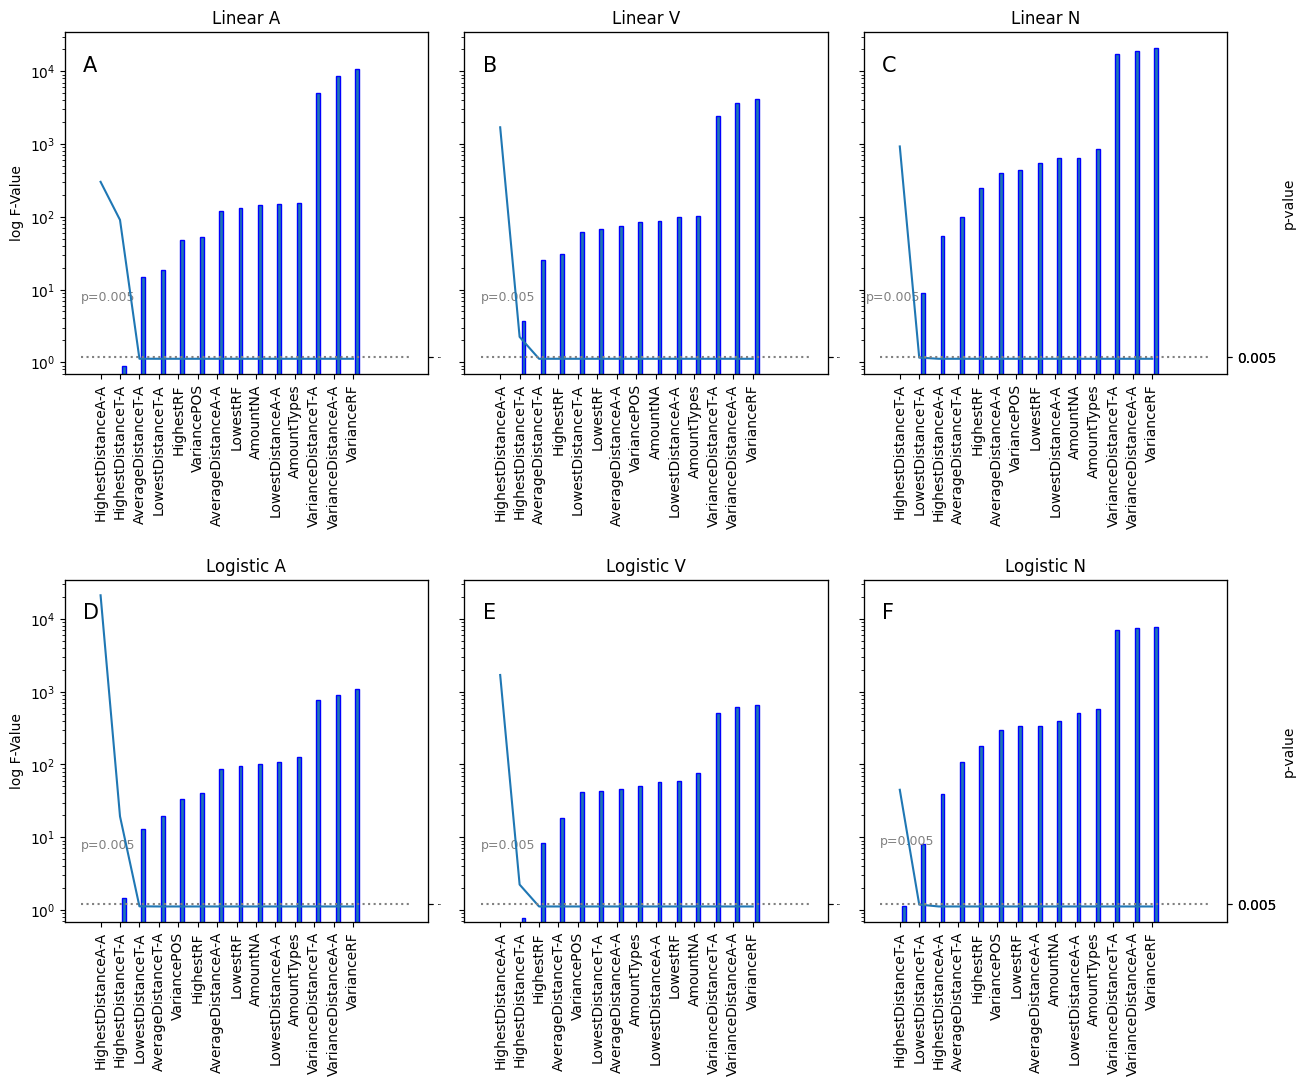

In [8]:
# plotting all feature f-values in one plot lin+log all wordclasses
import matplotlib.pyplot as plt
import numpy as np


fig, ((ax11, ax12,ax13),(ax21, ax22,ax23)) = plt.subplots(ncols = 3, nrows = 2, sharex=False, sharey = True,figsize=(15,10) )
plt.subplots_adjust(top = 0.99, bottom=0.1, hspace=0.6, wspace=0.1)
# shared features for all plots
#fig.suptitle("Feature importances via Linear Regression for " + wordclass)
width = 0.2
ticks = np.arange(1,len(sorted_featuresLinA)+1,1)
ax11.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax12.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax13.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax21.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax22.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax23.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax11.set_yscale('log')
ax21.set_yscale('log')
ax11.set_ylabel('log F-Value')
ax21.set_ylabel('log F-Value')
# linear A
ax11.bar((ticks+width), height=sorted_scoresLinA, width = width, align='center',ec='blue') # plotting feature sccores 
ax11p = ax11.twinx()
ax11p.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], sorted_pvaluesLinA)  # plotting p-values
#ax11p.set_ylabel('p-value')
ax11th = ax11.twinx()
ax11th.sharey(ax11p)
ax11th.plot([0,17],[0.005,0.005], color = 'grey', ls= 'dotted')  #plotting 0.005 p-value threshold
ax11.set_xticklabels(sorted_featuresLinA,rotation=90,fontsize=10) 
ax11.text(0.1, 10000, str('A'), color="black", fontsize=15)
ax11.text(0, 7, str('p=0.005'), color="grey", fontsize=9)
ax11.set_title('Linear A')
ax11p.tick_params(axis='y', labelsize=0) #get rid of y lables
ax11p.set_yticks(ticks = [0.005], labels = [0.005])
ax11th.tick_params(axis='y', labelsize=0)
# linear V
ax12.bar((ticks+width), height=sorted_scoresLinV, width = width, align='center',ec='blue') # plotting feature sccores 
ax12p = ax12.twinx()
ax12p.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], sorted_pvaluesLinV)  # plotting p-values
ax12p.sharey(ax11p)
#ax12p.set_ylabel('p-value')
ax12th = ax12.twinx()
ax12th.sharey(ax12p)
ax12th.plot([0,17],[0.005,0.005], color = 'grey', ls= 'dotted')  #plotting 0.005 p-value threshold
ax12.set_xticklabels(sorted_featuresLinV,rotation=90,fontsize=10) 
ax12.text(0.1, 10000, str('B'), color="black", fontsize=15)
ax12.text(0, 7, str('p=0.005'), color="grey", fontsize=9)
ax12.set_title('Linear V')
ax12p.tick_params(axis='y', labelsize=0) #get rid of y lables
ax12th.tick_params(axis='y', labelsize=0)
# linear N
ax13.bar((ticks+width), height=sorted_scoresLinN, width = width, align='center',ec='blue') # plotting feature sccores 
ax13p = ax13.twinx()
ax13p.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], sorted_pvaluesLinN)  # plotting p-values
ax13p.sharey(ax11p)
ax13p.set_ylabel('p-value')
ax13th = ax13.twinx()
ax13th.sharey(ax13p)
ax13th.plot([0,17],[0.005,0.005], color = 'grey', ls= 'dotted')  #plotting 0.005 p-value threshold
ax13.set_xticklabels(sorted_featuresLinN,rotation=90,fontsize=10) 
ax13.text(0.1, 10000, str('C'), color="black", fontsize=15)
ax13.text(-0.75, 7, str('p=0.005'), color="grey", fontsize=9)
ax13.set_title('Linear N')

# Logistic A
ax21.bar((ticks+width), height=sorted_scoresLogA, width = width, align='center',ec='blue') # plotting feature sccores 
ax21p = ax21.twinx()
ax21p.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], sorted_pvaluesLogA)  # plotting p-values
ax21p.sharey(ax11p)
#ax11p.set_ylabel('p-value')
ax21th = ax21.twinx()
ax21th.sharey(ax21p)
ax21th.plot([0,17],[0.005,0.005], color = 'grey', ls= 'dotted')  #plotting 0.005 p-value threshold
ax21.set_xticklabels(sorted_featuresLogA,rotation=90,fontsize=10) 
ax21.text(0.1, 10000, str('D'), color="black", fontsize=15)
ax21.text(0, 7, str('p=0.005'), color="grey", fontsize=9)
ax21.set_title('Logistic A')
ax21p.tick_params(axis='y', labelsize=0) #get rid of y lables
ax21th.tick_params(axis='y', labelsize=0)
# Logistic V
ax22.bar((ticks+width), height=sorted_scoresLogV, width = width, align='center',ec='blue') # plotting feature sccores 
ax22p = ax22.twinx()
ax22p.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], sorted_pvaluesLinV)  # plotting p-values
ax22p.sharey(ax11p)
#ax12p.set_ylabel('p-value')
ax22th = ax22.twinx()
ax22th.sharey(ax22p)
ax22th.plot([0,17],[0.005,0.005], color = 'grey', ls= 'dotted')  #plotting 0.005 p-value threshold
ax22.set_xticklabels(sorted_featuresLogV,rotation=90,fontsize=10) 
ax22.text(0.1, 10000, str('E'), color="black", fontsize=15)
ax22.text(0, 7, str('p=0.005'), color="grey", fontsize=9)
ax22.set_title('Logistic V')
ax22p.tick_params(axis='y', labelsize=0) #get rid of y lables
ax22th.tick_params(axis='y', labelsize=0)
# Logistic N
ax23.bar((ticks+width), height=sorted_scoresLogN, width = width, align='center',ec='blue') # plotting feature sccores 
ax23p = ax23.twinx()
ax23p.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], sorted_pvaluesLogN)  # plotting p-values
ax23p.sharey(ax11p)
ax23p.set_ylabel('p-value')
ax23th = ax23.twinx()
ax23th.sharey(ax23p)
ax23th.plot([0,17],[0.005,0.005], color = 'grey', ls= 'dotted')  #plotting 0.005 p-value threshold
ax23.set_xticklabels(sorted_featuresLogN,rotation=90,fontsize=10) 
ax23.text(0.1, 10000, str('F'), color="black", fontsize=15)
ax23.text(0, 8, str('p=0.005'), color="grey", fontsize=9)
ax23.set_title('Logistic N')

fig.show()

# Looking at Linear Regression feature weights in Extremes

- no penalization because no feature reduction
- same performance measures as in ElasticNet only pulling out feature weights and plotting them

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score
from scipy.stats import spearmanr, kendalltau
from statistics import mean

In [ ]:
# Extreme tetsing with 1-Fold linear Regression
# collect every nth out of extreme dataset as test

dataset = 'extreme'
wordclass = 'nouns'
#wordclass = 'verbs'
#wordclass = 'adj'

nth = 4


df = '/compLing/students/hiwi-theses/data/aylin.wahl/MUDCATData/original_data/targets_Brysbaert_' +dataset+'/'+'NORMnoNAtypes_'+wordclass+'_'+dataset+'_AssocTable.csv'
train = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTable.csv'
train = pd.read_csv(train)
df = pd.read_csv(df)

# selecting out features
train = train.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1) #features not used

#get every nth abst and conc target of extreme
abst = df.loc[df['CS'] < 2.5,:]
conc = df.loc[df['CS'] > 2.5,:]
target = []
target.append(abst.iloc[::nth, :] ) #select every nth row and add dataframe to list
target.append(conc.iloc[::nth, :] ) #select every nth row and add dataframe to list
target = pd.concat(target)
testtargets = list(target['Unnamed: 0']) # get test targets

#select testtargets out of filtered dataframe to have same vectors
test = pd.DataFrame(columns=list(train.columns))
for i in testtargets:
    test = test.append(train.loc[train['Unnamed: 0'] == i], ignore_index = True)

# delete testtargets out of filtered train dataframe
for i in testtargets:   #itterating through test targets
    train.drop(train.loc[train['Unnamed: 0']==i].index, inplace=True)  #dropping rows in df that are in test
#shuffle and clean train and test
print(train)
print(test)
train = train.drop(['Unnamed: 0'], axis=1) #drop targets for regression 
test = test.drop(['Unnamed: 0'], axis=1) #drop targets for regression
featurelist = list(train.columns)
featurelist.remove('CS')
train = train.sample(frac=1).reset_index(drop=True) #shuffeling rows
test = test.sample(frac=1).reset_index(drop=True) #shuffeling rows
train = train.to_numpy()
test = test.to_numpy()

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('LINEAR New Version: 1-Fold - Extreme Set',file=f)
    print('NORMnoNAtypes_'+wordclass+'_'+dataset+'_'+'1/'+str(nth)+': (trainamount,X-1=featureamount) '+str(train.shape),file =f)
    print('NORMnoNAtypes_'+wordclass+'_'+dataset+'_'+'1/'+str(nth)+': (testamount,X-1=featureamount) '+str(test.shape),file=f)
    #

In [ ]:
# regression: test on 1/n of dataframe and training on rest, spearmancollection for those predictions
 
X = train[:, 1:]    #assoc vectors: predictors
y = train[:, 0]     #CS: response variable
Xtest = test[:, 1:] #assoc vectors: predictors
ytest = test[:, 0]  #CS: response variable

# LinearRegression with feature performance
# normalizing features: center to same mean and unit variance with z-score scaling (StandardScaler())
#scaler = StandardScaler()
# normlaizing features: 
scaling = 'MinMaxScaler()'
scaler = MinMaxScaler()
Xtest_scale = scaler.fit_transform(Xtest)
X_scale = scaler.fit_transform(X)
# fit model
model = LinearRegression(positive = True)
model.fit(X_scale,y)

# Predicting test fold
#setting up output dictionary
out = {'CS HUMAN': [],'CS MODEL': []}
out = defaultdict(list)
#itterating through vectors
v = 0
while v<= (test.shape[0]-1):
    vector = Xtest_scale[v,:]
    pred = round(float(model.predict([vector])),2)
    out['CS MODEL'].append(pred)             #adding predicted value
    out['CS HUMAN'].append(ytest[v])         #adding human CS
    v += 1
# Correaltion measures on all predicted CS values in 'out'
#correlation measures of human and model concreteness scores
corr,pval = spearmanr(out['CS HUMAN'],out['CS MODEL'])
corr1,pval1 = kendalltau(out['CS HUMAN'],out['CS MODEL'])
print('SPEARMAN CORRELATION: '+ str(corr))

# Getting the coefficient weights
# get coefficients
# sorting output for score values
sort_index = np.argsort(model.coef_)
sorted_features = [featurelist[i] for i in sort_index]
sorted_coef = [model.coef_[i] for i in sort_index]
print(sorted_features)
print(sorted_coef)
    
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
#if close to -1/1 both scores are pos/neg correlating, if p-value smaller 0.05 correl statistically significant
    print('Scaler: '+str(scaling),file=f)
    print('Params: '+str(model.get_params(deep=True)),file=f)
    print('Number of Features: '+str(model.n_features_in_),file=f)
    print('Spearman correaltion: ' + str(corr), file=f)
    print('Spearman p-value: ' + str(pval), file=f)
    print('Kendall correlation: ' + str(corr1), file=f)
    print('Kendall p-value: ' + str(pval1), file=f)
    print('MeanAbsoluteError on testdata: '+str(mean_absolute_error(out['CS HUMAN'],out['CS MODEL'])),file=f)
    print('R2 on testdata: ' + str(r2_score(out['CS HUMAN'],out['CS MODEL'])), file=f)
    print('R2 on testdata with score: ' + str(model.score(Xtest_scale ,ytest)), file=f)
    print('Score R2 on traindata: '+str(model.score(X_scale,y)),file=f)
    print('Params: '+str(model.get_params(deep=True)),file=f)
   # print('Model Ranks: '+str(model.rank_),file=f)
    print('Features_Sorted: '+str(sorted_features),file=f)
    print('Coefficients: '+ str(sorted_coef),file=f)
    print("--------------------------------------------------------------------",file=f)
    
print('FINISHED :)')

In [ ]:
# plot coefficients
fig, ax = plt.subplots()
width = 0.2
ticks = np.arange(1,len(sorted_features)+1,1)
ax.bar((ticks+width), height=sorted_coef, width = width, align='center',ec='blue') # plotting feature sccores 
ax.set_ylabel('LogCoefficient weight')

#ax2 = ax.twinx()
#ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], sorted_pvalues)  # plotting p-values
#ax2.set_ylabel('p-value')
#ax3 = ax.twinx()
#ax3.sharey(ax2)
#ax3.plot([0,22],[0.005,0.005])  #plotting 0.005 p-value threshold

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(sorted_features,rotation=90,fontsize=8) 
ax.set_yscale('log')
fig.suptitle("Feature importances via LinearRegression Coefficients for " + wordclass)
fig.show()

# Looking into linear regression feature weights with cross-validation and full dataset testing

In [ ]:
# PROBLEM!!! no pvalues available -> therefore f_regression used 
# first: get weights with a non-crossvalidated run wiht the whole dataset 
# outcome: weights plus their pvalues

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score
from scipy.stats import spearmanr, kendalltau
from statistics import mean

#wordclass = 'nouns'
#wordclass = 'verbs'
wordclass = 'adj'

df = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTableNewPOS.csv'
df = pd.read_csv(df)
df = df.drop(['Target'], axis=1)
#df = df.to_numpy()

# selecting features
#df = df.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1) #features not used
featurelist = list(df.columns)
featurelist.remove('CS')
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('Linear Regression: Feature weights one fold whole dataset no performance NewPOS',file=f)
    print(wordclass+'_FeatureTable.csv: '+str(df.shape),file =f)

# LinearRegression with feature performance
# normalizing features: center to same mean and unit variance with z-score scaling (StandardScaler())
#scaler = StandardScaler()
# normlaizing features: 
df = df.to_numpy()
X = df[:, 1:]    #assoc vectors: predictors
y = df[:, 0]     #CS: response variable
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
# fit model
model = LinearRegression(positive = True)
model.fit(X_scale,y)

# Getting the coefficient weights
# get coefficients
# sorting output for score values
sort_index = np.argsort(model.coef_)
sorted_features = [featurelist[i] for i in sort_index]
sorted_coef = [model.coef_[i] for i in sort_index]
print(sorted_features)
print(sorted_coef)

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
#if close to -1/1 both scores are pos/neg correlating, if p-value smaller 0.05 correl statistically significant
    print('Scaler: MinMaxScaler()',file=f)
    print('Params: '+str(model.get_params(deep=True)),file=f)
    print('Number of Features: '+str(model.n_features_in_),file=f)
    print('Params: '+str(model.get_params(deep=True)),file=f)
   # print('Model Ranks: '+str(model.rank_),file=f)
    print('Features_Sorted: '+str(sorted_features),file=f)
    print('Coefficients: '+ str(sorted_coef),file=f)
    print("--------------------------------------------------------------------",file=f)
    
print('FINISHED :)')


In [ ]:
# plot coefficients
fig, ax = plt.subplots()
width = 0.2
ticks = np.arange(1,len(sorted_features)+1,1)
ax.bar((ticks+width), height=sorted_coef, width = width, align='center',ec='blue') # plotting feature sccores 
ax.set_ylabel('LinCoefficient weight')

#ax2 = ax.twinx()
#ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], sorted_pvalues)  # plotting p-values
#ax2.set_ylabel('p-value')
#ax3 = ax.twinx()
#ax3.sharey(ax2)
#ax3.plot([0,22],[0.005,0.005])  #plotting 0.005 p-value threshold

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(sorted_features,rotation=90,fontsize=8) 
#ax.set_yscale('log')
fig.suptitle("Feature importances via LinearRegression Coefficients for " + wordclass)
fig.show()

In [1]:
# second: get performance with a cross-validated run on the whole dataset
# outcome: spearman, spearman stddev,  MAE, R2 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score
from scipy.stats import spearmanr, kendalltau
from statistics import mean, stdev

#wordclass = 'nouns'
#wordclass = 'verbs'
wordclass = 'adj'

foldN = 10

df = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTableNewPOS.csv'
df = pd.read_csv(df)
df = df.drop(['Target'], axis=1)
#df = df.to_numpy()

# selecting features
#df = df.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1) #features not used

#name folds in kfold column
from sklearn import model_selection
kf = model_selection.KFold(n_splits=foldN)   # initiate the k-fold class from model_selection module
for fold, (trn_, val_) in enumerate(kf.split(X=df)):  # fill the new kfold column
    df.loc[val_, 'kfold'] = fold
#split dataset df0 up to df(foldN-1)
folds = []
for num in range(0,foldN):
    globals()['df'+str(num)] = df[df['kfold'] == num]
    globals()['df'+str(num)] = globals()['df'+str(num)].drop(['kfold'],axis=1) #delete kfold column
    folds.append(globals()['df'+str(num)])  #list with the folddataframes

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('Linear Regression: Performance cross-validated NewPOS',file=f)
    print('NORMnoNAtypes_'+wordclass+'_'+str(foldN)+': (fullamount,X-1=featureamount) '+str(df.shape),file =f)
    print('NORMnoNAtypes_'+wordclass+'_'+str(foldN)+': (foldamount,X-1=featureamount) '+str(df0.shape),file=f)

In [2]:
#Linear REGRESSION WITH GRIDSEARCH HYPERPARAMETERS
r2 = []
mae = []
spearmancorr = []
spearmanp = []
kendallp = []
kendallcorr = []
score = []
# normalizing features: center to same mean and unit variance with z-score scaling (StandardScaler())
#scaler = StandardScaler()
# normlaizing features: 
scaler = MinMaxScaler()

for i in range(0,len(folds)):
    # getting train and test folds for this itteration
    print('TESTED FOLD INDEX:' + str(i))
    subfolds = folds.copy() #copy folds dataframes 
    del subfolds[i]         #delete testing dataframe
    train = pd.concat(subfolds)  #concat all dataframes except testing one for training
    train = train.to_numpy()
    test = folds[i].to_numpy()  #get testing fold
    X = train[:, 1:]    #assoc vectors: predictors
    X_scale = scaler.fit_transform(X)
    y = train[:, 0]     #CS: response variable
    Xtest = test[:, 1:] #assoc vectors: predictors
    Xtest_scale = scaler.fit_transform(Xtest)
    ytest = test[:, 0]  #CS: response variable
        
    # Linear REGRESSION
    cv = LinearRegression(positive = True)  #define model
    cv.fit(X_scale,y)
    sc = cv.score(X_scale,y)
    score.append(sc)

    # Predicting test fold
    #setting up output dictionary
    out = {'CS HUMAN': [],'CS MODEL': []}
    out = defaultdict(list)
    #itterating through vectors
    v = 0
    while v<= (test.shape[0]-1):
        vector = Xtest_scale[v,:]
        pred = round(float(cv.predict([vector])),2)
        out['CS MODEL'].append(pred)             #adding predicted value
        out['CS HUMAN'].append(ytest[v])         #adding human CS
        v += 1
    
    #correlation measures of human and model concreteness scores
    corr,pval = spearmanr(out['CS HUMAN'],out['CS MODEL'])
    corr1,pval1 = kendalltau(out['CS HUMAN'],out['CS MODEL'])
    rtwo = r2_score(out['CS HUMAN'],out['CS MODEL'])
    r2.append(round(rtwo,3))
    mae.append(mean_absolute_error(out['CS HUMAN'],out['CS MODEL']))
    spearmancorr.append(round(corr,3))
    spearmanp.append(pval)
    kendallp.append(pval1)
    kendallcorr.append(round(corr1,3))
    print('SPEARMAN CORRELATION: '+ str(corr))
    print('R2: ' + str(rtwo))
    print('MAE: ' + str(mean_absolute_error(out['CS HUMAN'],out['CS MODEL'])))

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
#if close to -1/1 both scores are pos/neg correlating, if p-value smaller 0.05 correl statistically significant
    #print('Best Estimator: '+str(cv.best_estimator_),file=f)
    print('NewPOS',file=f)
    print('scaling = MinMaxScaler()', file = f)
    print('Number of Features: '+str(cv.n_features_in_),file=f)
    print('Spearman correaltion: ' + str(spearmancorr), file=f)
    print('Spearman corr Mean: ' + str(mean(spearmancorr)), file=f)
    print('Spearman Stddev.: '+str(stdev(spearmancorr)),file=f)
    print('Spearman p-value: ' + str(mean(spearmanp)), file=f)
    print('Spearman p-value Mean: ' + str(spearmanp), file=f)
    print('Kendall correlation: ' + str(kendallcorr), file=f)
    print('Kendall corr Mean: ' + str(mean(kendallcorr)), file=f)
    print('Kendall Stddev.: '+str(stdev(kendallcorr)),file=f)
    print('Kendall p-value: ' + str(kendallp), file=f)
    print('Kendall p-value Mean: ' + str(mean(kendallp)), file=f)
    print('MeanAbsoluteError on testdata: '+str(mae),file=f)
    print('Mean of MeanAbsoluteError on testdata: '+str(mean(mae)),file=f)
    print('R2 on testdata: ' + str(r2), file=f)
    print('R2 Mean on testdata: ' + str(mean(r2)), file=f) 
    print('Score R2 on traindata: '+str(score),file=f)
    print("--------------------------------------------------------------------",file=f)
    
print('FINISHED :)')
     

TESTED FOLD INDEX:0
SPEARMAN CORRELATION: 0.9836946010930899
R2: 0.8958566486787819
MAE: 0.11437956204379564
TESTED FOLD INDEX:1
SPEARMAN CORRELATION: 0.9556551772155198
R2: 0.9053313363916247
MAE: 0.12065693430656935
TESTED FOLD INDEX:2
SPEARMAN CORRELATION: 0.9778328345685876
R2: 0.8119595542700953
MAE: 0.13905109489051093
TESTED FOLD INDEX:3
SPEARMAN CORRELATION: 0.9639649314458929
R2: 0.8061880322922178
MAE: 0.23970802919708026
TESTED FOLD INDEX:4
SPEARMAN CORRELATION: 0.9637083372976278
R2: 0.8028305874402709
MAE: 0.18299270072992702
TESTED FOLD INDEX:5
SPEARMAN CORRELATION: 0.9687206799741438
R2: 0.6591435565457966
MAE: 0.2837956204379562
TESTED FOLD INDEX:6
SPEARMAN CORRELATION: 0.9578245486938308
R2: 0.9105439488677174
MAE: 0.1694890510948905
TESTED FOLD INDEX:7
SPEARMAN CORRELATION: 0.9828969663587437
R2: 0.8886143392749399
MAE: 0.14321167883211677
TESTED FOLD INDEX:8
SPEARMAN CORRELATION: 0.9638662626221649
R2: 0.8675523022582432
MAE: 0.15131386861313867
TESTED FOLD INDEX:9
S

# Looking at Logistic Regression feature weights in Extremes

- no penalization because no feature reduction
- same performance measures as in ElasticNet only pulling out feature weights and plotting them

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from statistics import mean

In [ ]:
# collect every nth out of extreme dataset as test

dataset = 'extreme'
#wordclass = 'nouns'
#wordclass = 'verbs'
wordclass = 'adj'

nth = 4

df = '/compLing/students/hiwi-theses/data/aylin.wahl/MUDCATData/original_data/targets_Brysbaert_' +dataset+'/'+'NORMnoNAtypes_'+wordclass+'_'+dataset+'_AssocTable.csv'
train = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTable.csv'
train = pd.read_csv(train)
df = pd.read_csv(df)

# selecting out features
train = train.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1)

train['CS'].values[train['CS'].values < 2.5] = 0  #abstract categorical
train['CS'].values[train['CS'].values >= 2.5] = 1 #concrete categorical
df['CS'].values[df['CS'].values < 2.5] = 0  #abstract categorical
df['CS'].values[df['CS'].values >= 2.5] = 1 #concrete categorical

#get every nth abst and conc target of extreme
abst = df.loc[df['CS'] == 0,:]
conc = df.loc[df['CS'] == 1,:]
target = []
target.append(abst.iloc[::nth, :] ) #select every nth row and add dataframe to list
target.append(conc.iloc[::nth, :] ) #select every nth row and add dataframe to list
target = pd.concat(target)
testtargets = list(target['Unnamed: 0']) # get test targets
#select testtargets out of filtered dataframe to have same vectors
test = pd.DataFrame(columns=list(train.columns))
for i in testtargets:
    test = test.append(train.loc[train['Unnamed: 0'] == i], ignore_index = True)        
# delete testtargets out of filtered train dataframe
for i in testtargets:   #itterating through test targets
    train.drop(train.loc[train['Unnamed: 0']==i].index, inplace=True)  #dropping rows in df that are in test
#shuffle and clean/make categorical train and test
train = train.drop(['Unnamed: 0'], axis=1) #drop targets for regression 
test = test.drop(['Unnamed: 0'], axis=1) #drop targets for regression
featurelist = list(train.columns)
featurelist.remove('CS')
train = train.sample(frac=1).reset_index(drop=True) #shuffeling rows
test = test.sample(frac=1).reset_index(drop=True) #shuffeling rows
train = train.to_numpy()
test = test.to_numpy()

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('LOGISTIC New Version: 1-Fold - Extreme Set',file=f)
    print('NORMnoNAtypes_'+wordclass+'_'+dataset+'_'+'1/'+str(nth)+': (trainamount,X-1=featureamount) '+str(train.shape),file =f)
    print('NORMnoNAtypes_'+wordclass+'_'+dataset+'_'+'1/'+str(nth)+': (testamount,X-1=featureamount) '+str(test.shape),file=f)


In [ ]:
# regression: test on 1/n of dataframe and training on rest, spearmancollection for those predictions
 
X = train[:, 1:]    #assoc vectors: predictors
y = train[:, 0]     #CS: response variable
y = y.astype(int)
Xtest = test[:, 1:] #assoc vectors: predictors
ytest = test[:, 0]  #CS: response variable
ytest = ytest.astype(int)

# LinearRegression with feature performance
# normalizing features: center to same mean and unit variance with z-score scaling (StandardScaler())
#scaler = StandardScaler()
# normlaizing features: 
scaling = 'MinMaxScaler()'
scaler = MinMaxScaler()
Xtest_scale = scaler.fit_transform(Xtest)
X_scale = scaler.fit_transform(X)
# fit model
model = LogisticRegression(penalty = 'none', solver = 'saga')
model.fit(X_scale,y)

# Predicting the test fold
ymodel = model.predict(Xtest_scale)

#performance measure 
matchesN = 0
lableabstN = 0
lableconcN = 0
print('Number of concrete predictions: '+str(sum(ymodel)))
for ind, v in enumerate(ymodel):
    if ymodel[ind] == ytest[ind]:
        matchesN += 1
        if v == 0:         #counting lables of matching predictions
            lableabstN += 1
        else:
            lableconcN += 1
precision,recall,fscore,support= score(ytest,ymodel,average='macro')

# Getting the coefficient weights
# get coefficients
# sorting output for score values
sort_index = np.argsort(model.coef_)
featurelist = np.asarray(featurelist)
sorted_features = [featurelist[i] for i in sort_index]
sorted_coef = [model.coef_[0][i] for i in sort_index]
print(sorted_features)
print(sorted_coef)

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
#if close to -1/1 both scores are pos/neg correlating, if p-value smaller 0.05 correl statistically significant
    print('Scaler: '+str(scaling),file=f)
    print('Params: '+str(model.get_params(deep=True)),file=f)
    print('Number of Features: '+str(model.n_features_in_),file=f)
    print('Matches/All predictions: ' + str(matchesN / len(ymodel)),file=f)
    print('Matching CONC/CONCtest: '+str(lableconcN / sum(ymodel)),file=f)
    print('Matching ABST/ABSTtest: '+str(lableabstN / (len(ymodel)-sum(ymodel))),file=f)
    print('Score on testdata: ' + str(model.score(Xtest_scale, ytest)), file=f)
    print('ClassifReportprecision Mean: ' + str(precision), file=f)
    print('ClassifReportrecall Mean: ' + str(recall), file=f)
    print('ClassifReportF1score Mean: ' + str(fscore), file=f)
    print('ClassifReport: ' + str(classification_report(ytest, ymodel, output_dict=True)), file=f)
    print('Features_Sorted: '+str(sorted_features),file=f)
    print('Coefficients: '+ str(sorted_coef),file=f)
    print("--------------------------------------------------------------------",file=f) 
    
print('FINISHED :)')

In [ ]:
# plot coefficients
fig, ax = plt.subplots()
width = 0.2
ticks = np.arange(1,len(list(sorted_features[0]))+1,1)
ax.bar((ticks+width), height=list(sorted_coef[0]), width = width, align='center',ec='blue') # plotting feature sccores 
ax.set_ylabel('Coefficient weight')

#ax2 = ax.twinx()
#ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], sorted_pvalues)  # plotting p-values
#ax2.set_ylabel('p-value')
#ax3 = ax.twinx()
#ax3.sharey(ax2)
#ax3.plot([0,22],[0.005,0.005])  #plotting 0.005 p-value threshold

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(list(sorted_features[0]),rotation=90,fontsize=8) 
#ax.set_yscale('log')
fig.suptitle("Feature importances via LogisticRegression Coefficients for " + wordclass)
fig.show()

# Looking into logistic regression feature weights with cross-validation and full dataset testing

In [ ]:
# PROBLEM!!! no pvalues available -> therefore f_classif used 
# first: get weights with a non-crossvalidated run wiht the whole dataset 
# outcome: weights plus their pvalues

In [7]:
# second: get performance with a cross-validated run on the whole dataset
# outcome: spearman, spearman stddev,  MAE, R2 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import precision_recall_fscore_support as score
from statistics import mean, stdev

#wordclass = 'nouns'
#wordclass = 'verbs'
wordclass = 'adj'

foldN = 10

df = '/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTableNewPOS.csv'
df = pd.read_csv(df)
df = df.drop(['Target'], axis=1)
#df = df.to_numpy()

# selecting features
#df = df.drop(['NounrelPOS','VerbrelPOS','AdjrelPOS','OtherrelPOS'], axis=1) #features not used

df['CS'].values[df['CS'].values < df['CS'].median()] = 0  #abstract categorical
df['CS'].values[df['CS'].values >= df['CS'].median()] = 1 #concrete categorical

#split dataset into N folds

foldN = 10

# separating concrete and abstract to take same percentage of concrete and abstarct into folds
conc = df.loc[df['CS'] == 1]
conc.reset_index(inplace = True, drop = True)
abst = df.loc[df['CS'] == 0]
abst.reset_index(inplace = True, drop = True)

#name folds in kfold column
from sklearn import model_selection
kf = model_selection.KFold(n_splits=foldN)   # initiate the k-fold class from model_selection module
for fold, (trn_, val_) in enumerate(kf.split(X=abst)):  # fill the new kfold column for abstract
    abst.loc[val_, 'kfold'] = fold
for fold, (trn_, val_) in enumerate(kf.split(X=conc)):  # fill the new kfold column for concrete
    conc.loc[val_, 'kfold'] = fold
df = pd.concat([abst,conc])   # conc and abst back into df woth kfold column
df = df.sample(frac=1).reset_index(drop=True) #shuffeling rows of df dataframe

#split dataset df0 up to df(foldN-1)
folds = []
for num in range(0,foldN):
    globals()['df'+str(num)] = df[df['kfold'] == num]
    globals()['df'+str(num)] = globals()['df'+str(num)].drop(['kfold'],axis=1) #delete kfold column
    folds.append(globals()['df'+str(num)])  #list with the folddataframes

with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
    print('Logistic Regression: Performance cross-validated NewPOS',file=f)
    print('NORMnoNAtypes_'+wordclass+'_'+str(foldN)+': (fullamount,X-1=featureamount) '+str(df.shape),file =f)
    print('NORMnoNAtypes_'+wordclass+'_'+str(foldN)+': (foldamount,X-1=featureamount) '+str(df0.shape),file=f)
    

/tmp/ipykernel_32653/2812649430.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abst.loc[val_, 'kfold'] = fold
/tmp/ipykernel_32653/2812649430.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conc.loc[val_, 'kfold'] = fold


In [8]:
#logistic REGRESSION WITH GRIDSEARCH HYPERPARAMETERS

permatches = []
perconc = []
perabst = []
meanacc = []
classrepprecision = []
classreprecall = []
classrepf1 = []
scaler = MinMaxScaler()

for i in range(0,len(folds)):
    # getting train and test folds for this itteration
    print('TESTED FOLD INDEX:' + str(i))
    subfolds = folds.copy() #copy folds dataframes 
    del subfolds[i]         #delete testing dataframe
    train = pd.concat(subfolds)  #concat all dataframes except testing one for training
    train = train.to_numpy()
    test = folds[i].to_numpy()  #get testing fold
    X = train[:, 1:]    #assoc vectors: predictors
    X_scale = scaler.fit_transform(X)
    y = train[:, 0]     #CS: response variable
    y = y.astype(int)
    Xtest = test[:, 1:] #assoc vectors: predictors
    Xtest_scale = scaler.fit_transform(Xtest)
    ytest = test[:, 0]  #CS: response variable
    ytest = ytest.astype(int)
    # LOGISTIC REGRESSION 
    cv = LogisticRegression(penalty = 'none', solver = 'saga')
    cv.fit(X_scale,y)
    
    # Predicting the test fold
    ymodel = cv.predict(Xtest_scale)
    print(ymodel)
    print(ytest)
    #performance measure 
    matchesN = 0
    lableabstN = 0
    lableconcN = 0
   # csm = out['CS MODEL']
   # print(csm)
   # print('Number of concrete predictions: '+str(sum(csm)))
    print('Number of concrete predictions: '+str(sum(ymodel)))
   # csh = out['CS HUMAN']
    for ind, v in enumerate(ymodel):
        if ymodel[ind] == ytest[ind]:
            matchesN += 1
            if v == 0:         #counting lables of matching predictions
                lableabstN += 1
            else:
                lableconcN += 1
    permatches.append(matchesN / len(ymodel))
    perconc.append(lableconcN / sum(ymodel))
    perabst.append(lableabstN / (len(ymodel)-sum(ymodel)))
    meanacc.append(cv.score(Xtest, ytest))
    precision,recall,fscore,support= score(ytest,ymodel,average='macro')
    classrepprecision.append(precision)
    classreprecall.append(recall)
    classrepf1.append(fscore)
    #classrep.append(classification_report(ytest, ymodel, output_dict=True))
          
with open("/compLing/students/hiwi-theses/projects/aylin.wahl/FeatureModelless_Stats.txt", "a") as f:
#if close to -1/1 both scores are pos/neg correlating, if p-value smaller 0.05 correl statistically significant
    #print('Best Estimator: '+str(cv.best_estimator_),file=f)
    print('NewPOS',file=f)
    print('scaling = MinMaxScaler()', file = f)
    print('Number of Features: '+str(cv.n_features_in_),file=f)
    #print('Mean_train_score: '+str(cv.cv_results_['mean_train_score']),file=f)
    print('Matches/All predictions: ' + str(permatches),file=f)
    print('Matches/All predictions Mean: ' + str(mean(permatches)),file=f)
    print('Matches/All predictions Stddev: ' + str(stdev(permatches)),file=f)
    print('Matching CONC/CONCtest: '+str(perconc),file=f)
    print('Mean Matching CONC/CONCtest: '+str(mean(perconc)),file=f)
    print('Stddev Matching CONC/CONCetst: '+str(stdev(perconc)),file=f)
    print('Matching ABST/ABSTtest: '+str(perabst),file=f)
    print('Mean Matching ABST/ABSTtest: '+str(mean(perabst)),file=f)
    print('Stddev Matching ABST/ABSTtest: '+str(stdev(perabst)),file=f)
    print('Mean Accuracy: ' + str(meanacc), file=f)
    print('Mean of Mean Accuracy: ' + str(mean(meanacc)), file=f) 
    print('Mean Accuracy Stddev: ' + str(stdev(meanacc)), file=f) 
    print('ClassifReportprecision Mean: ' + str(mean(classrepprecision)), file=f)
    print('ClassifReportprecision Stdev: ' + str(stdev(classrepprecision)), file=f)
    print('ClassifReportrecall Mean: ' + str(mean(classreprecall)), file=f)
    print('ClassifReportrecall Stdev: ' + str(stdev(classreprecall)), file=f)
    print('ClassifReportF1score Mean: ' + str(mean(classrepf1)), file=f)
    print('ClassifReportF1score Stdev: ' + str(stdev(classrepf1)), file=f)
    print("--------------------------------------------------------------------",file=f)
  
print('FINISHED :)')

TESTED FOLD INDEX:0
[1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0]
[1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0]
Number of concrete predictions: 69
TESTED FOLD INDEX:1
[1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 1 

/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn

[1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1]
[1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1]
Number of concrete predictions: 77
TESTED FOLD INDEX:8
[0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1]
[0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 

/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# DUMMY CODE: TRYING around with Lasso 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

#wordclass = 'verbs'
wordclass = 'nouns'
#wordclass = 'adj'



df = pd.read_csv('/compLing/students/hiwi-theses/projects/aylin.wahl/'+wordclass+'_FeatureTable.csv')

X =  df.iloc[:,2:] #features
y =  df.iloc[:,1] #target

#fitting the model
pipe_lasso = Pipeline([('StandardSclaer', StandardScaler()), ('Lasso', Lasso(tol=1e-02))])
param_dist_lasso = {'Lasso__alpha': np.logspace(-1e-5, 1e-5, num=5)}
randomized_pipe = RandomizedSearchCV(estimator = pipe_lasso, param_distributions = param_dist_lasso)
                                        # cv=3, n_iter=30, n_jobs=-1)
randomized_pipe.fit(X,y)       

##pipeline = Pipeline([
  #  ('StandardScaler',StandardScaler()), #standardization - classification
    #("MinMax Scaling", MinMaxScaler()), #normalization - regression
   # ("Lasso", LassoCV(alphas= np.logspace(-1e-5, 1e-5, num=5), tol=1e-02))])

# Scale the data and fit the model
#pipeline.fit(X, y)

#lasso = LassoCV(alphas= np.logspace(-1e-5, 1e-5, num=5), tol=1e-02).fit(X, y)

importance = np.abs(pipe_lasso.named_steps["Lasso"].coef_)
#importance = randomized_pipe.named_steps['Lasso'].coef_
feature_names = list(df.columns)
feature_names.remove('Unnamed: 0')
feature_names.remove('CS')


fig, ax = plt.subplots()
width = 0.2
ticks = np.arange(1,len(feature_names)+1,1)
ax.bar((ticks+width), height=importance, width = width, align='center')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(feature_names,rotation=90,fontsize=8)
fig.suptitle("Feature importances via coefficients for " + wordclass)
#plt.set_xticklabels(feature_names,rotation=90,fontsize=12)
fig.show()

